# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
cred_analise = pd.read_csv('cred_analise_clean1.csv')
cred_analise.head()

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,True,False,False,False,False,True,False,False,False,False
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,False,False,True,False,False,True,False,False,False,False
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,False,False,True,False,False,True,False,False,False,False
3,3,0,46.224658,2.106849,1,1,1,1,2.0,False,...,True,False,False,False,False,True,False,False,False,False
4,4,0,29.230137,3.021918,1,0,0,0,2.0,False,...,True,False,False,False,False,True,False,False,False,False


In [3]:
cred_analise.columns.unique()

Index(['Unnamed: 0', 'qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau', 'sexo_F', 'sexo_M',
       'posse_de_veiculo_N', 'posse_de_veiculo_Y', 'posse_de_imovel_N',
       'posse_de_imovel_Y', 'tipo_renda_Commercial associate',
       'tipo_renda_Pensioner', 'tipo_renda_State servant',
       'tipo_renda_Student', 'tipo_renda_Working', 'educacao_Academic degree',
       'educacao_Higher education', 'educacao_Incomplete higher',
       'educacao_Lower secondary', 'educacao_Secondary / secondary special',
       'estado_civil_Civil marriage', 'estado_civil_Married',
       'estado_civil_Separated', 'estado_civil_Single / not married',
       'estado_civil_Widow', 'tipo_residencia_Co-op apartment',
       'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_resid

In [4]:
#verificando missings

cred_analise.isna().sum()

Unnamed: 0                                0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
sexo_F                                    0
sexo_M                                    0
posse_de_veiculo_N                        0
posse_de_veiculo_Y                        0
posse_de_imovel_N                         0
posse_de_imovel_Y                         0
tipo_renda_Commercial associate           0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Academic degree                  0
educacao_Higher education       

In [5]:
# verificando os tipos de dados

cred_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              16650 non-null  int64  
 1   qtd_filhos                              16650 non-null  int64  
 2   idade                                   16650 non-null  float64
 3   tempo_emprego                           16650 non-null  float64
 4   possui_celular                          16650 non-null  int64  
 5   possui_fone_comercial                   16650 non-null  int64  
 6   possui_fone                             16650 non-null  int64  
 7   possui_email                            16650 non-null  int64  
 8   qt_pessoas_residencia                   16650 non-null  float64
 9   mau                                     16650 non-null  bool   
 10  sexo_F                                  16650 non-null  bo

In [6]:
# deixei de fazer isso no exercício anterior pois não entendi bem os enunciados

for column in cred_analise.columns:
    if cred_analise[column].dtype == 'bool':
        cred_analise[column] = cred_analise[column].astype(int)

cred_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              16650 non-null  int64  
 1   qtd_filhos                              16650 non-null  int64  
 2   idade                                   16650 non-null  float64
 3   tempo_emprego                           16650 non-null  float64
 4   possui_celular                          16650 non-null  int64  
 5   possui_fone_comercial                   16650 non-null  int64  
 6   possui_fone                             16650 non-null  int64  
 7   possui_email                            16650 non-null  int64  
 8   qt_pessoas_residencia                   16650 non-null  float64
 9   mau                                     16650 non-null  int64  
 10  sexo_F                                  16650 non-null  in

In [7]:
x_treino = cred_analise[0:int(len(cred_analise)*.7)].drop('mau',axis=1) #base de treino
x_teste = cred_analise[int(len(cred_analise)*.7):int(len(cred_analise))].drop('mau',axis=1) # base de teste

y_treino = cred_analise[0:int(len(cred_analise)*.7)].mau #variável de interesse
y_teste = cred_analise[int(len(cred_analise)*.7):int(len(cred_analise))].mau

y_treino.value_counts()

mau
0    11529
1      126
Name: count, dtype: int64

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [23]:
#1
clf = DecisionTreeClassifier(max_depth=2,random_state=100)
clf

DecisionTreeClassifier(max_depth=2, random_state=100)

In [24]:
#2
clf = clf.fit(x_treino,y_treino)
clf

DecisionTreeClassifier(max_depth=2, random_state=100)

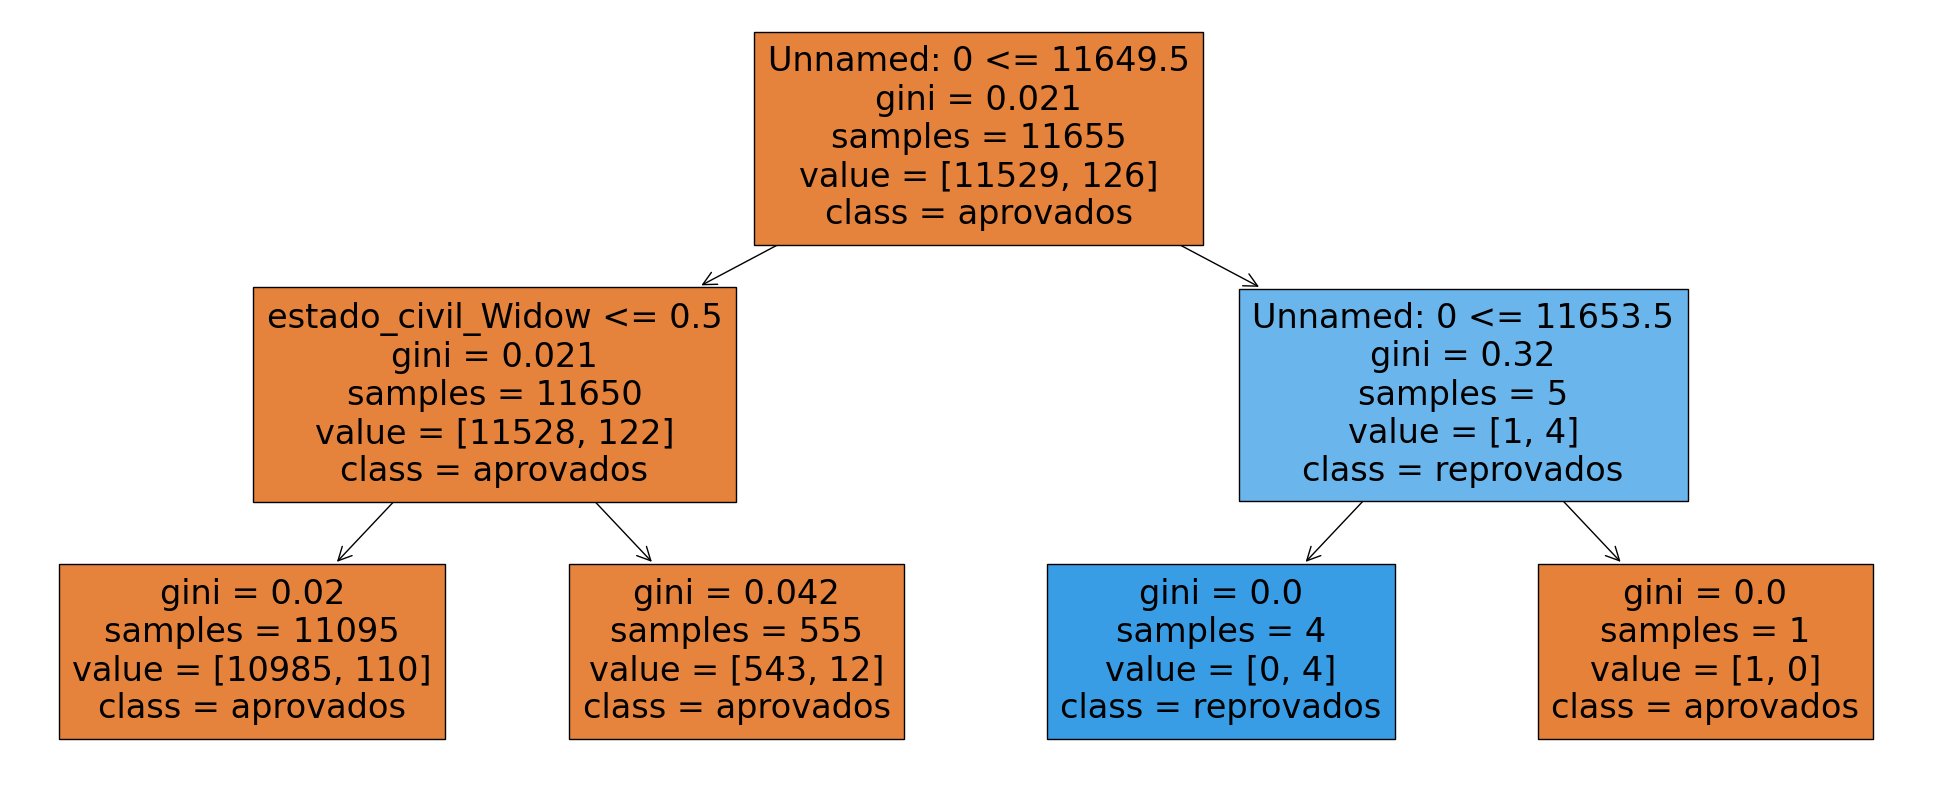

In [25]:
#3
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names= x_treino.columns.tolist());

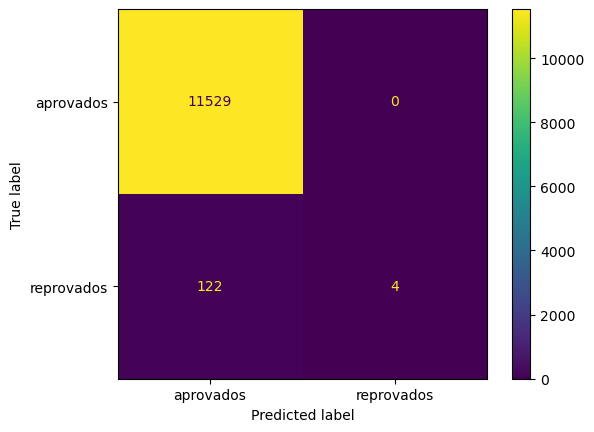

In [32]:
#4

predict = clf.predict(x_treino)
cm = confusion_matrix(y_treino, predict, labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])

MatrizDeConfusao.plot()

In [33]:
#5

accuracy_score(y_treino, predict)

0.9895323895323895

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [ ]:
#1 entendi que já fiz isso nos itens anteriores

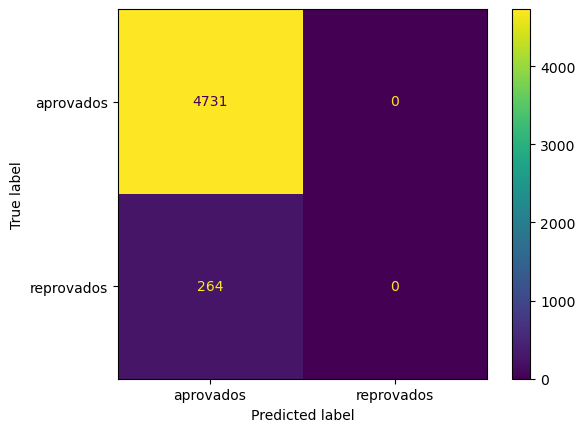

In [34]:
#2

test = clf.predict(x_teste)
cm = confusion_matrix(y_teste, test, labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])

MatrizDeConfusao.plot()

In [35]:
#3


accuracy_score(y_teste, test)

0.9471471471471471

In [39]:
#4

clf1 = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=5,random_state=123)
clf1

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5, random_state=123)

In [40]:
clf1 = clf1.fit(x_teste,y_teste)
clf1

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5, random_state=123)

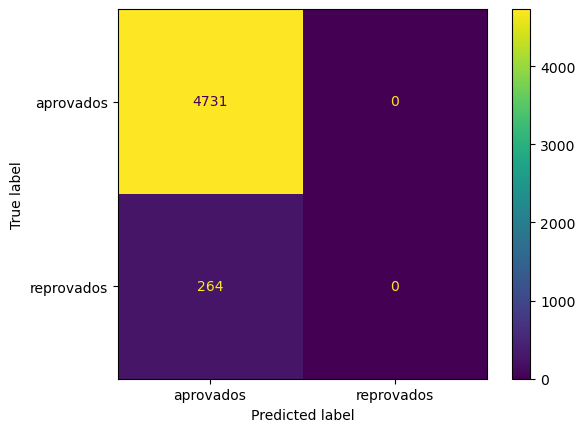

In [41]:
test1 = clf1.predict(x_teste)
cm = confusion_matrix(y_teste, test, labels=clf1.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])

MatrizDeConfusao.plot()

In [43]:
prop_maus = np.mean(y_teste == 1)

print(f"Proporção de proponentes classificados como 'maus': {prop_maus:.2%}")

Proporção de proponentes classificados como 'maus': 5.29%


In [46]:
#5

todos_bons = np.zeros_like(y_treino)  
acc = accuracy_score(y_treino, todos_bons)

print(f"Acurácia ao classificar tudo como 'bons': {acc}")

Acurácia ao classificar tudo como 'bons': 0.9891891891891892
